In [2]:
import polars as pl
import matplotlib.pyplot as plt

In [3]:
archivo_csv = 'C:/Users/migue/Downloads/Tr_fico_Vehicular_ANI.csv'

In [5]:
df = pl.read_csv(archivo_csv)

In [6]:
print(df.head())

shape: (5, 9)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ ValorTari ┆ CantidadT ┆ CantidadE ┆ CantidadE │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ fa        ┆ rafico    ┆ vasores   ┆ xentos787 │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 7000      ┆ 27730     ┆ 0         ┆ 660       │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 7600      ┆ 9930      ┆ 

In [7]:
df.shape

(102812, 9)

In [8]:
encabezados = df.columns
print(encabezados)

['IdPeaje', 'Peaje', 'CategoriaTarifa', 'Desde', 'Hasta', 'ValorTarifa', 'CantidadTrafico', 'CantidadEvasores', 'CantidadExentos787']


In [17]:
mapeo_numerico = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'EA': 6, 'EG': 7, 'ER': 8, 'IE': 9}

df = df.select([
    pl.col('*'),  # Seleccionar todas las columnas existentes
    (pl.col('CategoriaTarifa').apply(lambda x: mapeo_numerico.get(x)).alias('CategoriaNumerica'))
])

# Imprimir el dataframe actualizado
print(df)

C:\Users\migue\AppData\Local\Temp\ipykernel_17276\2587997180.py:5: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  (pl.col('CategoriaTarifa').apply(lambda x: mapeo_numerico.get(x)).alias('CategoriaNumerica'))


shape: (102_812, 11)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadE ┆ CantidadE ┆ Categpria ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ vasores   ┆ xentos787 ┆ Numerica  ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 0         ┆ 660       ┆ 1         ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 0         ┆ 70   

In [23]:
df = df.drop("CategpriaNumerica")


In [24]:
print(df)

shape: (102_812, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadT ┆ CantidadE ┆ CantidadE ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ rafico    ┆ vasores   ┆ xentos787 ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 27730     ┆ 0         ┆ 660       ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 9930      ┆ 0    

In [25]:
df_alvarado = df.filter(df['Peaje'] == 'ALVARADO')

In [26]:
tabla_alvarado = pl.DataFrame(df_alvarado)
print(tabla_alvarado)


shape: (767, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadT ┆ CantidadE ┆ CantidadE ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ rafico    ┆ vasores   ┆ xentos787 ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 27730     ┆ 0         ┆ 660       ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 9930      ┆ 0        

In [27]:
df_alvarado_2015 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2015'))
tabla_alvarado_2015 = df_alvarado_2015
print(tabla_alvarado_2015)

shape: (45, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ IdPeaje ┆ Peaje    ┆ CategoriaT ┆ Desde      ┆ … ┆ CantidadT ┆ CantidadE ┆ CantidadE ┆ Categoria │
│ ---     ┆ ---      ┆ arifa      ┆ ---        ┆   ┆ rafico    ┆ vasores   ┆ xentos787 ┆ Numerica  │
│ i64     ┆ str      ┆ ---        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ str        ┆            ┆   ┆ i64       ┆ i64       ┆ i64       ┆ i64       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1       ┆ ALVARADO ┆ I          ┆ 08/21/2015 ┆ … ┆ 27730     ┆ 0         ┆ 660       ┆ 1         │
│         ┆          ┆            ┆ 12:00:00   ┆   ┆           ┆           ┆           ┆           │
│         ┆          ┆            ┆ AM         ┆   ┆           ┆           ┆           ┆           │
│ 1       ┆ ALVARADO ┆ II         ┆ 08/21/2015 ┆ … ┆ 9930      ┆ 0         

In [63]:
df_alvarado_2016 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2016'))
df_alvarado_2017 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2017'))
df_alvarado_2018 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2018'))
df_alvarado_2019 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2019'))
df_alvarado_2020 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2020'))
df_alvarado_2021 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2021'))
df_alvarado_2022 = df_alvarado.filter(df_alvarado['Desde'].str.contains('2022'))

In [67]:

Trafico_alvarado_2015 = df_alvarado_2015['CantidadTrafico'].sum()
Trafico_alvarado_2016 = df_alvarado_2016['CantidadTrafico'].sum()
Trafico_alvarado_2017 = df_alvarado_2017['CantidadTrafico'].sum()
Trafico_alvarado_2018 = df_alvarado_2018['CantidadTrafico'].sum()
Trafico_alvarado_2019 = df_alvarado_2019['CantidadTrafico'].sum()
Trafico_alvarado_2020 = df_alvarado_2020['CantidadTrafico'].sum()
Trafico_alvarado_2021 = df_alvarado_2021['CantidadTrafico'].sum()





In [69]:

# Create a dictionary with the variable names and values
data = {
    'Año': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Trafico': [Trafico_alvarado_2015, Trafico_alvarado_2016, Trafico_alvarado_2017, Trafico_alvarado_2018, Trafico_alvarado_2019, Trafico_alvarado_2020, Trafico_alvarado_2021]
}

# Create the dataframe
tabla_trafico_año = pl.DataFrame(data)

# Show the table
print(tabla_trafico_año)


shape: (7, 2)
┌──────┬─────────┐
│ Año  ┆ Trafico │
│ ---  ┆ ---     │
│ i64  ┆ i64     │
╞══════╪═════════╡
│ 2015 ┆ 658658  │
│ 2016 ┆ 1819202 │
│ 2017 ┆ 1828206 │
│ 2018 ┆ 1786006 │
│ 2019 ┆ 1722795 │
│ 2020 ┆ 1413890 │
│ 2021 ┆ 1820410 │
└──────┴─────────┘


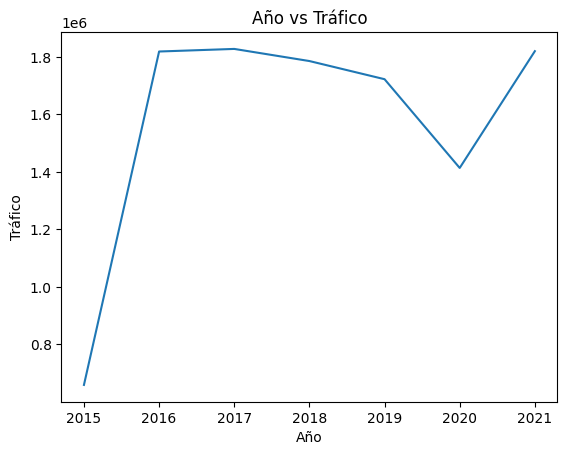

In [70]:
plt.plot(data['Año'], data['Trafico'])
plt.xlabel('Año')
plt.ylabel('Tráfico')
plt.title('Año vs Tráfico')
plt.show()


Categoría	Descripción
Categoría I	Automóviles, camperos y camionetas
Categoría II	Buses, busetas y microbuses con eje trasero de doble llanta
Categoría III	Camiones pequeños de dos ejes
Categoría IV	Camiones grandes de dos ejes
Categoría V	Camiones de tres y cuatro ejes
Categoría VI 	Camiones de cinco ejes
Categoría VII	Camiones de seis ejes o mas
Categoría VIII - IX	Vehículos servicio público (Peaje Siberia)
IE-10	Vehículos tarifa especial (Peaje Paraguachón) 
IEE - IEEE	Vehículos tarifa especial (Peajes Pipiral, Naranjal, Boquerón I y Boquerón II)
IIA	Vehículos tarifa especial (Peaje Patios)
E.A	Eje adicional
E.G	Eje Grúa
E.R	Eje adicional remolque
E.C	Eje cañero

FUENTE:ANI

In [71]:
transito_2015_categoria_1 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2015_categoria_2 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2015_categoria_3 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2015_categoria_4 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2015_categoria_5 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2015_categoria_6 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2015_categoria_7 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2015_categoria_8 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2015_categoria_9 = df_alvarado_2015.filter(df_alvarado_2015['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
transito_2016_categoria_1 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2016_categoria_2 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2016_categoria_3 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2016_categoria_4 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2016_categoria_5 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2016_categoria_6 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2016_categoria_7 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2016_categoria_8 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2016_categoria_9 = df_alvarado_2016.filter(df_alvarado_2016['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
transito_2017_categoria_1 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2017_categoria_2 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2017_categoria_3 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2017_categoria_4 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2017_categoria_5 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2017_categoria_6 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2017_categoria_7 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2017_categoria_8 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2017_categoria_9 = df_alvarado_2017.filter(df_alvarado_2017['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
transito_2018_categoria_1 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2018_categoria_2 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2018_categoria_3 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2018_categoria_4 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2018_categoria_5 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2018_categoria_6 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2018_categoria_7 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2018_categoria_8 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2018_categoria_9 = df_alvarado_2018.filter(df_alvarado_2018['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
transito_2019_categoria_1 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2019_categoria_2 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2019_categoria_3 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2019_categoria_4 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2019_categoria_5 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2019_categoria_6 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2019_categoria_7 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2019_categoria_8 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2019_categoria_9 = df_alvarado_2019.filter(df_alvarado_2019['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
transito_2020_categoria_1 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2020_categoria_2 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2020_categoria_3 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2020_categoria_4 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2020_categoria_5 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2020_categoria_6 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2020_categoria_7 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2020_categoria_8 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2020_categoria_9 = df_alvarado_2020.filter(df_alvarado_2020['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
transito_2021_categoria_1 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 1)['CantidadTrafico'].sum()
transito_2021_categoria_2 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 2)['CantidadTrafico'].sum()
transito_2021_categoria_3 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 3)['CantidadTrafico'].sum()
transito_2021_categoria_4 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 4)['CantidadTrafico'].sum()
transito_2021_categoria_5 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 5)['CantidadTrafico'].sum()
transito_2021_categoria_6 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 6)['CantidadTrafico'].sum()
transito_2021_categoria_7 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 7)['CantidadTrafico'].sum()
transito_2021_categoria_8 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 8)['CantidadTrafico'].sum()
transito_2021_categoria_9 = df_alvarado_2021.filter(df_alvarado_2021['CategoriaNumerica'] == 9)['CantidadTrafico'].sum()
                                                                                      


In [73]:
# Create a dictionary with the variable names and values
data_categorias = {
    'Año': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Categoria I': [transito_2015_categoria_1, transito_2016_categoria_1, transito_2017_categoria_1, transito_2018_categoria_1, transito_2019_categoria_1, transito_2020_categoria_1, transito_2021_categoria_1],
    'Categoria II': [transito_2015_categoria_2, transito_2016_categoria_2, transito_2017_categoria_2, transito_2018_categoria_2, transito_2019_categoria_2, transito_2020_categoria_2, transito_2021_categoria_2],
    'Categoria III': [transito_2015_categoria_3, transito_2016_categoria_3, transito_2017_categoria_3, transito_2018_categoria_3, transito_2019_categoria_3, transito_2020_categoria_3, transito_2021_categoria_3],
    'Categoria IV': [transito_2015_categoria_4, transito_2016_categoria_4, transito_2017_categoria_4, transito_2018_categoria_4, transito_2019_categoria_4, transito_2020_categoria_4, transito_2021_categoria_4],
    'Categoria V': [transito_2015_categoria_5, transito_2016_categoria_5, transito_2017_categoria_5, transito_2018_categoria_5, transito_2019_categoria_5, transito_2020_categoria_5, transito_2021_categoria_5],
    'Categoria EA': [transito_2015_categoria_6, transito_2016_categoria_6, transito_2017_categoria_6, transito_2018_categoria_6, transito_2019_categoria_6, transito_2020_categoria_6, transito_2021_categoria_6],
    'Categoria EG': [transito_2015_categoria_7, transito_2016_categoria_7, transito_2017_categoria_7, transito_2018_categoria_7, transito_2019_categoria_7, transito_2020_categoria_7, transito_2021_categoria_7],
    'Categoria ER': [transito_2015_categoria_8, transito_2016_categoria_8, transito_2017_categoria_8, transito_2018_categoria_8, transito_2019_categoria_8, transito_2020_categoria_8, transito_2021_categoria_8],
    'Categoria IE': [transito_2015_categoria_9, transito_2016_categoria_9, transito_2017_categoria_9, transito_2018_categoria_9, transito_2019_categoria_9, transito_2020_categoria_9, transito_2021_categoria_9]
}

# Create the dataframe
tabla_trafico_año_categoria = pl.DataFrame(data_categorias)

# Show the table
print(tabla_trafico_año_categoria)

shape: (7, 10)
┌──────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ Año  ┆ Categoria  ┆ Categoria  ┆ Categoria  ┆ … ┆ Categoria  ┆ Categoria ┆ Categoria ┆ Categoria │
│ ---  ┆ I          ┆ II         ┆ III        ┆   ┆ EA         ┆ EG        ┆ ER        ┆ IE        │
│ i64  ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│      ┆ i64        ┆ i64        ┆ i64        ┆   ┆ i64        ┆ i64       ┆ i64       ┆ i64       │
╞══════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2015 ┆ 419029     ┆ 133834     ┆ 18353      ┆ … ┆ 98         ┆ 81        ┆ 641       ┆ 5501      │
│ 2016 ┆ 1181790    ┆ 302722     ┆ 76509      ┆ … ┆ 217        ┆ 220       ┆ 792       ┆ 17268     │
│ 2017 ┆ 1166338    ┆ 133673     ┆ 106880     ┆ … ┆ 0          ┆ 0         ┆ 0         ┆ 38803     │
│ 2018 ┆ 1150188    ┆ 133588     ┆ 94107      ┆ … ┆ 0          ┆ 0         ┆

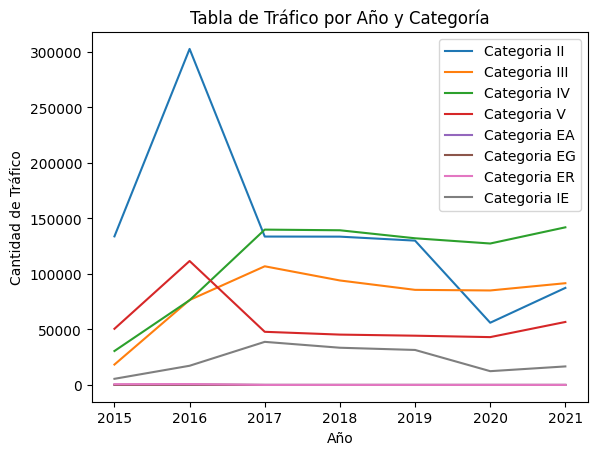

In [77]:
# Extract the data from the "tabla_trafico_año_categoria" table
years = data['Año']
#categoria_I = data['Categoria I']
categoria_II = data['Categoria II']
categoria_III = data['Categoria III']
categoria_IV = data['Categoria IV']
categoria_V = data['Categoria V']
categoria_EA = data['Categoria EA']
categoria_EG = data['Categoria EG']
categoria_ER = data['Categoria ER']
categoria_IE = data['Categoria IE']

# Plot the data
#plt.plot(years, categoria_I, label='Categoria I')
plt.plot(years, categoria_II, label='Categoria II')
plt.plot(years, categoria_III, label='Categoria III')
plt.plot(years, categoria_IV, label='Categoria IV')
plt.plot(years, categoria_V, label='Categoria V')
plt.plot(years, categoria_EA, label='Categoria EA')
plt.plot(years, categoria_EG, label='Categoria EG')
plt.plot(years, categoria_ER, label='Categoria ER')
plt.plot(years, categoria_IE, label='Categoria IE')

# Add labels and title
plt.xlabel('Año')
plt.ylabel('Cantidad de Tráfico')
plt.title('Tabla de Tráfico por Año y Categoría')

# Add legend
plt.legend()

# Show the plot
plt.show()
